# library

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# parameter space

## read data - aerosol

In [23]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
print(len(s))
print(s)
# print('bulk_'+ s[0] + '_masses')

12
0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
11    h2o
dtype: object


In [24]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios"
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

In [25]:
d_bulk = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
        'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
        'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
        'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
        'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
        'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
        'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
        'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
        'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
        'bulk_'+ s[9] + '_masses': bulk_masses[9,:,:].ravel(),
        'bulk_'+ s[10] + '_masses': bulk_masses[10,:,:].ravel(),
        'bulk_'+ s[11] + '_masses': bulk_masses[11,:,:].ravel(),
        'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_bulk = pd.DataFrame(data=d_bulk)
print(df_bulk.shape)
df_bulk_2ndngt = df_bulk[((df_bulk.index.values % 49) >= 37) & ((df_bulk.index.values % 49) <= 48)]  # ngt: night
print(df_bulk_2ndngt.shape)

(4900, 13)
(1200, 13)


## read data - gas

In [26]:
s1 = pd.Series(['n2o5','o3','no','no2','hno3','h2so4','hcl','nh3'])
print(len(s1))
print(s1)

8
0     n2o5
1       o3
2       no
3      no2
4     hno3
5    h2so4
6      hcl
7      nh3
dtype: object


In [27]:
# Read data
gas_mixing_ratio = np.zeros((100, 49, 77))
sce_ind = np.zeros(100)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [28]:
d_gas = {'n2o5': gas_mixing_ratio[:, :, 7].ravel(),
         'o3': gas_mixing_ratio[:, :, 10].ravel(),
         'no': gas_mixing_ratio[:, :, 4].ravel(),
         'no2': gas_mixing_ratio[:, :, 5].ravel(),
         'hno3': gas_mixing_ratio[:, :, 1].ravel(),
         'h2so4': gas_mixing_ratio[:, :, 0].ravel(),
         'hcl': gas_mixing_ratio[:, :, 2].ravel(),
         'nh3': gas_mixing_ratio[:, :, 3].ravel(),
         }
df_gas = pd.DataFrame(data=d_gas)

## read data - combined

In [29]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[280.455 280.455 280.455 ... 280.455 280.455 280.455]
 [276.965 276.965 276.965 ... 276.965 276.965 276.965]
 [272.108 272.108 272.108 ... 272.108 272.108 272.108]
 ...
 [282.038 282.038 282.038 ... 282.038 282.038 282.038]
 [279.926 279.926 279.926 ... 279.926 279.926 279.926]
 [280.519 280.519 280.519 ... 280.519 280.519 280.519]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [30]:
hno3_mass_conc = gas_mixing_ratio[:, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp)
h2so4_mass_conc = gas_mixing_ratio[:, :, 0].ravel()*(df_env.p*98e-3)/(8.314*df_env.temp)

d_species = {'nitrate': hno3_mass_conc + bulk_masses[0,:,:].ravel(),
             'sulfate': h2so4_mass_conc + bulk_masses[1,:,:].ravel(),
             'oc': bulk_masses[2,:,:].ravel(),
             'soa': bulk_masses[3,:,:].ravel(),
             'nh4': bulk_masses[4,:,:].ravel(),
             'h2o': bulk_masses[11,:,:].ravel(),
             'n2o5': gas_mixing_ratio[:, :, 7].ravel(),
             'o3': gas_mixing_ratio[:, :, 10].ravel(),
             'no': gas_mixing_ratio[:, :, 4].ravel(),
             'no2': gas_mixing_ratio[:, :, 5].ravel(),}
df_species = pd.DataFrame(data = d_species)
print(df_species.shape)

(4900, 10)


In [31]:
s2 = pd.Series(['nitrate','sulfate','oc','soa','nh4','h2o','n2o5','o3','no','no2'])
print(len(s2))
print(s2)

10
0    nitrate
1    sulfate
2         oc
3        soa
4        nh4
5        h2o
6       n2o5
7         o3
8         no
9        no2
dtype: object


## plot

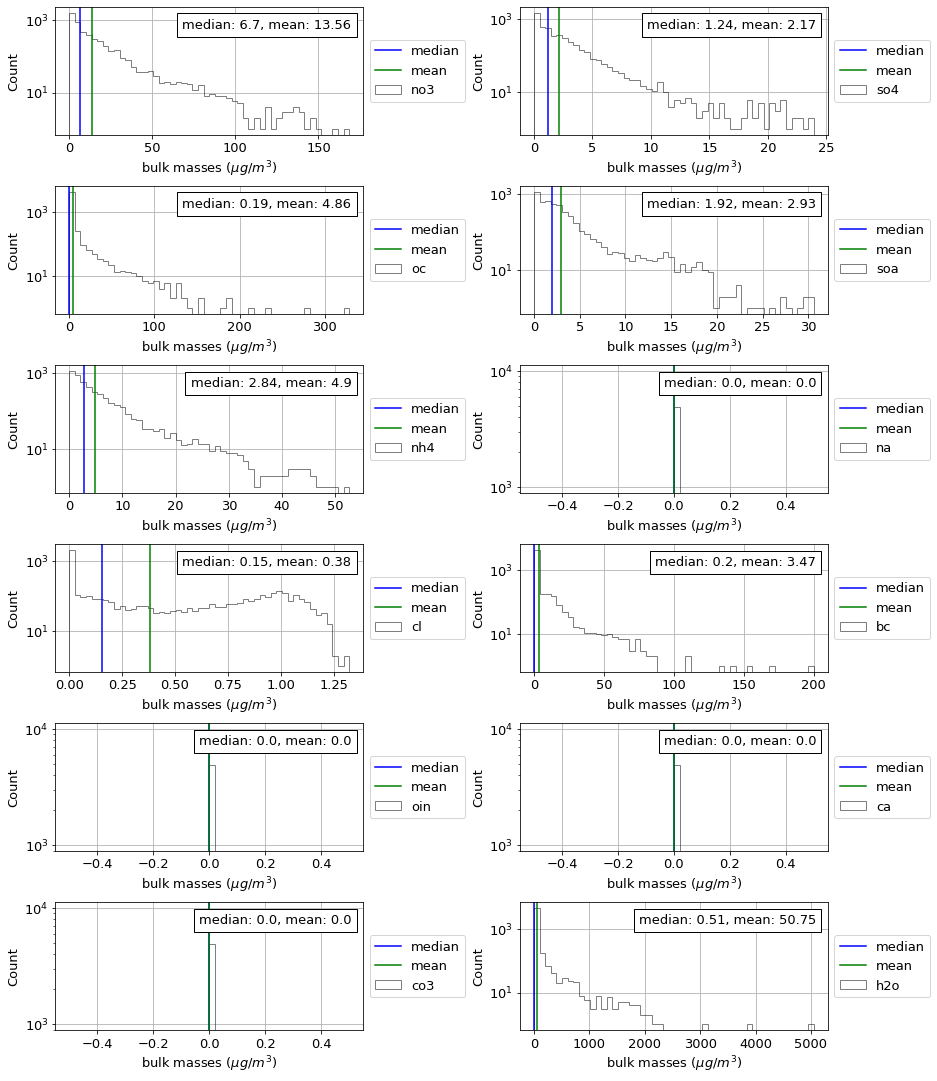

In [15]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(6,2,figsize=(13,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

p = 0
for i in np.arange(0,12,2):
    ax[p,0].hist(data = df_bulk, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s[i])
    ax[p,0].axvline(x = np.median(df_bulk['bulk_'+s[i]+'_masses']), color = 'b', label = 'median')
    ax[p,0].axvline(x = np.mean(df_bulk['bulk_'+s[i]+'_masses']), color = 'g', label = 'mean')
    ax[p,0].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,0].set_yscale('LOG')
    ax[p,0].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_bulk['bulk_'+s[i]+'_masses']), 2)
    median = np.round(np.median(df_bulk['bulk_'+s[i]+'_masses']), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,0].add_artist(anchored_text)
    ax[p,0].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

p = 0
for i in np.arange(1,13,2):
    ax[p,1].hist(data = df_bulk, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s[i])
    ax[p,1].axvline(x = np.median(df_bulk['bulk_'+s[i]+'_masses']), color = 'b', label = 'median')
    ax[p,1].axvline(x = np.mean(df_bulk['bulk_'+s[i]+'_masses']), color = 'g', label = 'mean')
    ax[p,1].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,1].set_yscale('LOG')
    ax[p,1].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_bulk['bulk_'+s[i]+'_masses']), 2)
    median = np.round(np.median(df_bulk['bulk_'+s[i]+'_masses']), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,1].add_artist(anchored_text)
    ax[p,1].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

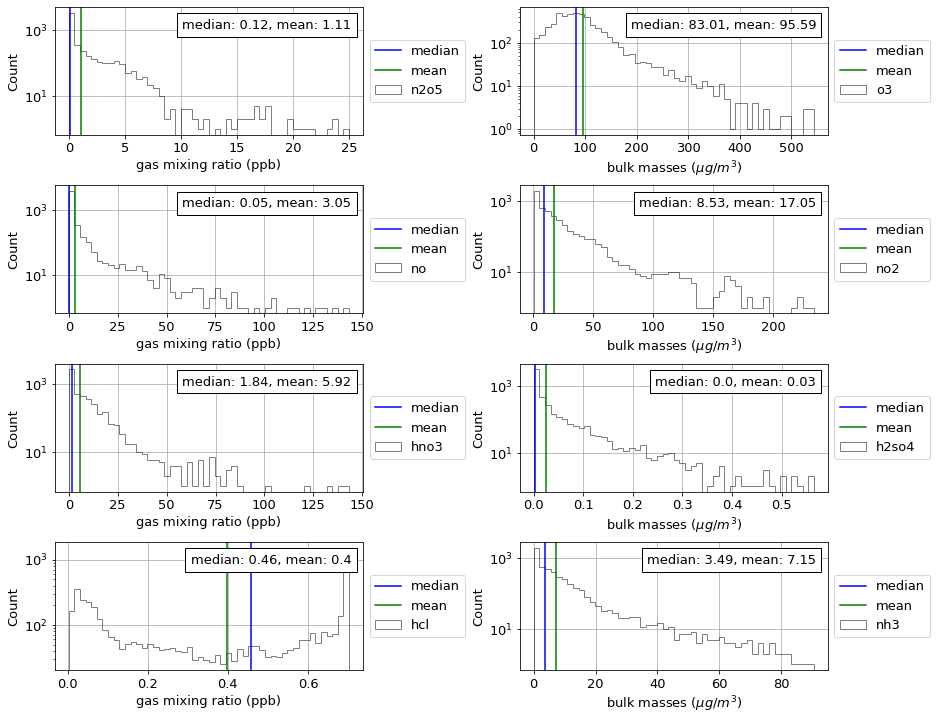

In [16]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(4,2,figsize=(13,10))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

p = 0
for i in np.arange(0,8,2):
    ax[p,0].hist(data = df_gas, x = s1[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s1[i])
    ax[p,0].axvline(x = np.median(df_gas[s1[i]]), color = 'b', label = 'median')
    ax[p,0].axvline(x = np.mean(df_gas[s1[i]]), color = 'g', label = 'mean')
    ax[p,0].set_xlabel('gas mixing ratio (ppb)')
    ax[p,0].set_yscale('LOG')
    ax[p,0].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_gas[s1[i]]), 2)
    median = np.round(np.median(df_gas[s1[i]]), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,0].add_artist(anchored_text)
    ax[p,0].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

p = 0
for i in np.arange(1,9,2):
    ax[p,1].hist(data = df_gas, x = s1[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s1[i])
    ax[p,1].axvline(x = np.median(df_gas[s1[i]]), color = 'b', label = 'median')
    ax[p,1].axvline(x = np.mean(df_gas[s1[i]]), color = 'g', label = 'mean')
    ax[p,1].set_xlabel(r'bulk masses ($\mu g/m^3$)')
    ax[p,1].set_yscale('LOG')
    ax[p,1].set_ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    ax[p,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mean = np.round(np.mean(df_gas[s1[i]]), 2)
    median = np.round(np.median(df_gas[s1[i]]), 2)
    anchored_text = AnchoredText("median: " + str(median) +", mean: " + str(mean), loc = 1)
    ax[p,1].add_artist(anchored_text)
    ax[p,1].grid()
    plt.tight_layout(pad = 0.5)
    p = p + 1

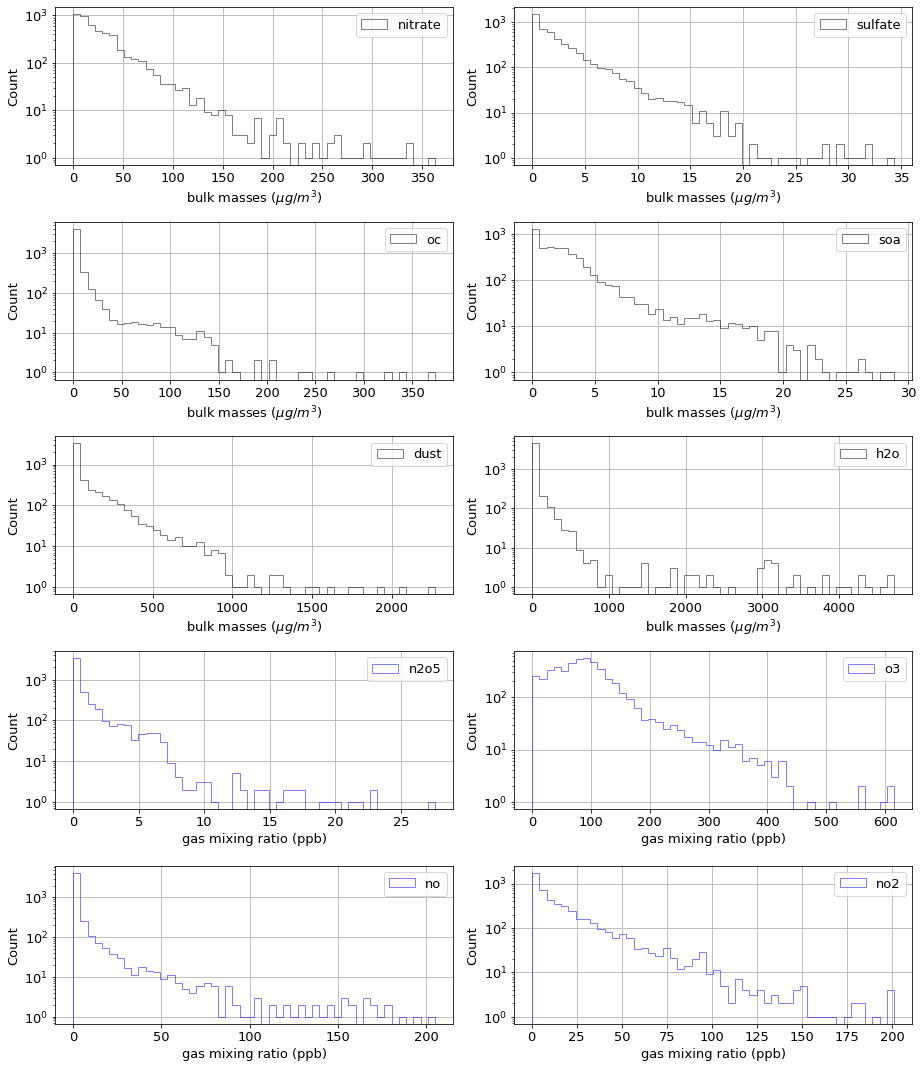

In [ ]:
plt.figure(figsize=(13,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

for i in range(6):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'bulk masses ($\mu g/m^3$)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()
for i in [6,7,8,9]:
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'b', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'gas mixing ratio (ppb)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid() 
plt.tight_layout(pad = 1.0)
# plt.savefig('1.pdf')

(1e-05, 1000.0)

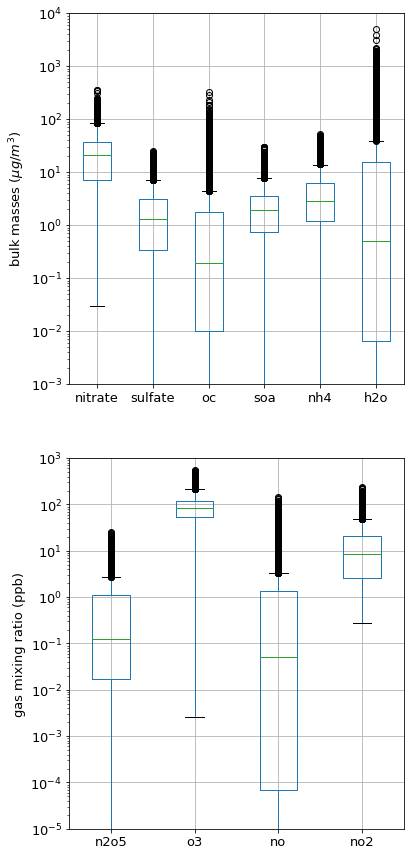

In [33]:
plt.figure(figsize=(6,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

plt.subplot(2,1,1)
df_species.boxplot(column = ['nitrate','sulfate','oc','soa','nh4','h2o'])
plt.yscale('log')
plt.ylabel(r'bulk masses ($\mu g/m^3$)')
plt.ylim(1e-3,1e4)

plt.subplot(2,1,2)
df_species.boxplot(column = ['n2o5','o3','no','no2'])
plt.yscale('log')
plt.ylabel(r'gas mixing ratio (ppb)')
plt.ylim(1e-5,1e3)

# emissions

In [62]:
f1 = '/data/keeling/a/yicenl2/d/project_n2o5/code_scenario_generator/cases/case_4_n2o5/lhs.txt'
df1 = pd.read_csv(f1, sep = '\s+', header = None)
print(df1.shape)
# print(df)

f2 = '/data/keeling/a/yicenl2/d/project_n2o5/code_scenario_generator/cases/case_4_n2o5/lhs_linear.txt'
df2 = pd.read_csv(f2, sep = '\s+', header = None)
print(df2.shape)
# print(df)

(100, 44)
(100, 44)


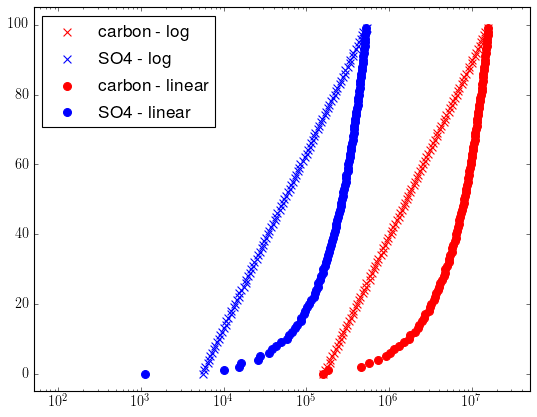

In [65]:
plt.scatter(df1.iloc[:,23].sort_values(ascending=True),df.index, color = 'r', label = 'carbon - log', marker = 'x', s = 50)
plt.scatter(df1.iloc[:,41].sort_values(ascending=True),df.index, color = 'b', label = 'SO4 - log', marker = 'x', s = 50)
plt.scatter(df2.iloc[:,23].sort_values(ascending=True),df.index, color = 'r', label = 'carbon - linear', s = 50)
plt.scatter(df2.iloc[:,41].sort_values(ascending=True),df.index, color = 'b', label = 'SO4 - linear', s = 50)
plt.xscale('log')
plt.xlim(5e1, 5e7)
plt.ylim(-5,105)
plt.legend(loc = 2, scatterpoints = 1)

# gamma_pop

## read data

In [2]:
# no seasalt & dust
gamma_pop = np.zeros((3,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            # print(filename[-29:-27])
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

In [3]:
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()    

d_gamma = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
         "gamma_pop_error": gamma_pop_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_gamma = pd.DataFrame(data=d_gamma)
print(df_gamma.shape)

df_gamma_2ndngt = df_gamma[((df_gamma.index.values % 49) >= 37) & ((df_gamma.index.values % 49) <= 48)]  # ngt: night
# pd.set_option('display.max_rows', df_nsd_2ndngt.shape[0]+1)
print(df_gamma_2ndngt.shape)
# print(df_nsd_2ndngt)

df1 = df_gamma_2ndngt.dropna()
# print(df1.shape)
null_data = df_gamma_2ndngt[df_gamma_2ndngt.isnull().any(axis=1)]
case_index = null_data.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(null_data.shape)
print(df_gamma_2ndngt['gamma_pop_error'].max())

(4900, 3)
(1200, 3)
[ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
 10 10 10 10 10 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12 12 12 12 17
 17 17 17 17 17 17 17 17 17 17 17 28 28 28 28 28 28 28 28 28 28 28 28 31
 31 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 32 33 33 33
 33 33 33 33 33 33 33 33 33 34 34 34 34 34 34 34 34 34 34 34 34 35 35 35
 35 35 35 35 35 35 35 35 35 40 40 40 40 40 40 40 40 40 40 40 40 44 44 44
 44 44 44 45 45 45 45 45 45 45 45 45 45 45 45 49 49 49 49 49 49 49 49 49
 49 49 49 50 50 50 50 50 50 50 50 50 50 50 50 51 51 51 51 51 51 51 51 51
 51 51 51 53 53 53 53 53 53 53 53 53 53 53 53 59 59 59 59 59 59 59 59 59
 59 59 59 63 63 63 63 63 63 63 63 63 63 63 63 69 69 69 69 69 69 69 69 69
 69 69 69 73 73 73 73 73 73 73 73 73 73 73 73 74 74 74 74 74 74 74 74 74
 74 77 77 77 77 77 77 77 77 77 77 77 77 89 89 89 89 89 89 89 89 89 89 89
 89 91 91 91 91 91 91 91 91 91 91 91 91]
[37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45

In [4]:
pd.set_option('display.max_rows', None)
print(df1.sort_values('gamma_pop_error', ascending=True))

      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
625        0.019961        0.002111       -89.421849
2391       0.017238        0.002506       -85.461997
2389       0.017929        0.002663       -85.146305
2390       0.017895        0.002660       -85.134710
2392       0.016299        0.002465       -84.877286
2393       0.015102        0.002469       -83.650456
3910       0.019926        0.003497       -82.450344
3909       0.019946        0.003502       -82.441430
3911       0.019885        0.003680       -81.495854
2394       0.013393        0.002499       -81.338408
3908       0.019959        0.003826       -80.832906
2193       0.019941        0.003932       -80.282864
3912       0.019844        0.003964       -80.024728
2194       0.019933        0.003995       -79.956280
2195       0.019922        0.004008       -79.882212
2198       0.019927        0.004010       -79.877762
2197       0.019932        0.004012       -79.869143
2196       0.019913        0.004012       -79.

## plot

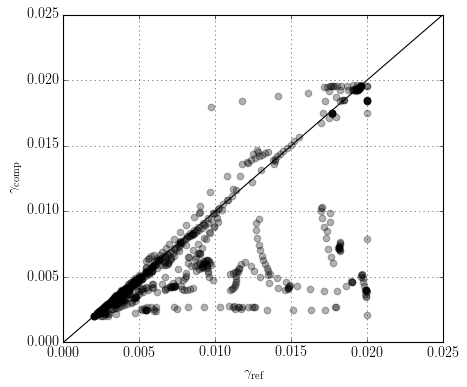

In [5]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6,5))
###################
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
a = plt.scatter(x, y, s = 35, color = 'k', alpha = 0.3, vmin=0, vmax=30)
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
# plt.title('Library without sea salt and dust emissions')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('2.pdf')

note: (3+250)/(1200-301) = 28.1% of population have +/- 20% error

# size distributions

## positions on scatter plot

In [6]:
# Find positions on 1:1 line
nsd_case_index = df_gamma_2ndngt.index.values
nsd_sce_index  = (nsd_case_index/49).astype(int)
nsd_hour_index = nsd_case_index % 49

df_on = df_gamma_2ndngt[((np.abs(df_gamma_2ndngt["gamma_pop_error"])) < 1)]
df_above = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) >= 20)]
df_below = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) <= -20)]

### on

In [7]:
# print(df_on.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_on.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_on.shape)
# pd.set_option('display.max_columns', df_wsd.shape[0]+1)

[86 75 98 86 36 71 96 36 86 84 72  9  0 71 64 99 67 86 86 98 84 96 55 55
 95 55 55 55 55 84 55 55 14 55 57 55 57 55 57 57 55 94 86 57 72 57 96 57
 29 29 57 67 29 98 29 22 86 57 29 72 67 75 94 90 58 86 86 58 58 58 57 58
 98 29 58 99 82 72 98 29 58 78 78 98 82 78  4 98 78 58 58 98 98 98 18 98
 98  8 25  8 67  8  8 23 23 43 82 96 23 94  4 72  8  8 18 58 23 95  4 23
 70  4 78  4  4  4  4  4  4 90  4 60 60 60  3 60  4 60 99 60 75 60  8 64
 58  8 82 14 23  8 58 72 67  8  8  8 64 76 67  9 23 72 90  9 67 23 25 94
 72 99 43 82  9 90 94 78 99 94 18 90 22 29 29 94  9 99 90 94 94 23 99 99
 94 95 99 57 99 27 99 71 99 94 94 43 82 43 96 43 43 43 64 43 43 78 22 27
 43 43 22 92 43 13 76 92 93 92 82 92 92 92 92 76]
[43 46 37 39 47 43 47 48 44 42 39 44 48 44 38 37 43 38 45 38 43 41 37 38
 46 39 40 41 43 45 42 44 46 45 41 46 42 47 44 45 48 37 46 40 40 43 48 46
 42 43 47 37 41 39 40 40 47 39 39 46 42 47 38 43 39 37 48 41 42 38 48 40
 40 38 43 38 37 41 41 37 44 46 47 42 38 48 37 43 45 37 45 44 48 45 37 47
 

### above

In [8]:
# print(df_above.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_above.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_above.shape)

[9 9 9]
[41 42 43]
(3, 3)


### below

In [9]:
# print(df_below.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_below.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_below.shape)
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)

[12 48 48 48 48 48 79 79 79 48 79 44 79 44 44 44 44 44 83 83 48 79 83 87
 83 48 87 83 87 48 79 48 83 87 87 87 48 87 79 48 87 79 79 79 83 79 97 97
 97 87 97 97 97 97 83 97 87 83 97 83 38 87 30 30 38 30 83 87 30 65 97 24
 39 65 30 65 31 65 65 65 39 65 65 24 65 30 65 38 65 83 65 24 30 97 30 80
 24 80 80 80 80 80 38 80 80 30 52 52 52 97 24 52 39 52 80 80  2 38 41 30
 41 41 80 80 41 24 30 30 38 38 41  2 24  2 38 41 38  2 24 66 66 66 66 66
 38 66 66 66  2 66 21 66 38 38 41 81 21 66 52  2 21 21 24 21 21 66 21 21
  2 21 81 21 21 21 39  2 81  2  2  2  2 41 81 46 81 81 81 81 81 81 81 24
 81 46 88 46 60 41 46 16 16 24 46 16 52 16 16 16 39 16 24 16 16 46 16 41
 88 16 16 88 88 88 46 88 60 61 52 88 46 20 88 41 46 88 52 25 52 39 88 41
 88 52 52 46 25 88 46 46 68 61]
[37 39 37 38 40 41 39 38 40 42 37 37 41 38 39 42 41 40 46 45 43 42 44 42
 43 44 43 42 41 45 43 46 41 38 39 37 47 40 44 48 44 48 45 47 40 46 43 42
 41 45 40 39 38 44 39 37 46 38 45 47 37 47 48 47 38 46 37 48 45 37 46 48
 38 38 44 39 38 40 

## read data

In [10]:
h1 = np.zeros((100,49,180)) # gamma * surf_dist
h2 = np.zeros((100,49,180)) # surf_area_dist
hgamma = np.zeros((100,49,180))
surf_area_dist = np.zeros((2,100,49,180)) # for PR
mass_dist = np.zeros((2,100,49,180))
num_dist = np.zeros((100,49,180))
no3_dist = np.zeros((100,49,180))
so4_dist = np.zeros((100,49,180))
wi_dist = np.zeros((100,49,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma[sce_index, t_index,:] = h1[sce_index, t_index,:]/h2[sce_index, t_index,:]
            surf_area_dist[0,sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            surf_area_dist[1,sce_index,t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6
            mass_dist[0,sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e9 # kg to µg
            mass_dist[1,sce_index,t_index,:] = ncf.variables["mass_dist_avg"].data*1e9 # kg to µg
            num_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[sce_index,t_index,:] = so4_dist[sce_index,t_index,:]/(so4_dist[sce_index,t_index,:]+no3_dist[sce_index,t_index,:])

## plot

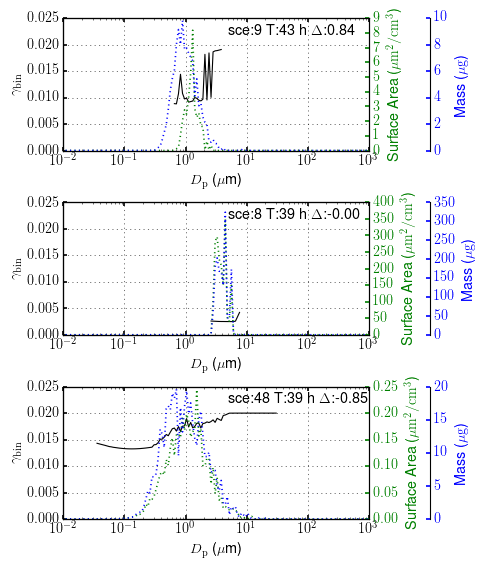

In [16]:
fig, ax = plt.subplots(3,figsize=(6,7))
fig.subplots_adjust(right=0.75)

sce_index = [9,8,48]
t_index = [43,39,39]

for i in range(3):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    # twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    # twin3.spines['right'].set_position(("axes", 1.4))

    y = hgamma[sce_index[i], t_index[i],:]
    ym = np.isfinite(hgamma[sce_index[i], t_index[i],:])

    w = wi_dist[sce_index[i], t_index[i], :]
    wm = np.isfinite(wi_dist[sce_index[i], t_index[i], :])

    p1 = ax[i].plot(diam[ym], y[ym], color = "k", ls = '-', lw = 1)
    p2 = twin1.plot(diam, surf_area_dist[0,sce_index[i], t_index[i], :], color = "g", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, mass_dist[1,sce_index[i], t_index[i], :], color = "b", ls = ':', lw = 1.5)
    # p4 = twin3.plot(diam[wm], w[wm], color = "c", ls = '-', lw = 1)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e3)
    ax[i].set_ylim(0,0.025)
    # twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm p}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$') 
    twin1.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin2.set_ylabel(r'Mass ($\rm \mu g$)')
    # twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i].yaxis.label.set_color('k')
    twin1.yaxis.label.set_color('g')
    twin2.yaxis.label.set_color('b')
    # twin3.yaxis.label.set_color('c')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='k', **tkw)
    twin1.tick_params(axis='y', colors='g', **tkw)
    twin2.tick_params(axis='y', colors='b', **tkw)
    # twin3.tick_params(axis='y', colors='c', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop[1,sce_index[i],t_index[i]] - gamma_pop[0,sce_index[i],t_index[i]])/gamma_pop[0,sce_index[i],t_index[i]]
    ax[i].grid()
    ax[i].text(5, 0.022, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))

plt.tight_layout(pad=0.5)
# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

# k_n2o5

## read data

In [17]:
# read in data with dust emission
reac_coeff_dust = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            reac_coeff_dust[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            reac_coeff_dust[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            time = ncf.variables["time"].data/3600

In [18]:
# calculate gamma_pop_error
reac_coeff_error_dust = (reac_coeff_dust[1,:,:].ravel() - 
               reac_coeff_dust[0,:,:].ravel())/reac_coeff_dust[0,:,:].ravel()

d_k_dust = {"n2o5_uptake_ref": reac_coeff_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
            "n2o5_uptake_comp": reac_coeff_dust[1, :, :].ravel(),
            "reac_coeff_error": reac_coeff_error_dust * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_k_dust = pd.DataFrame(data=d_k_dust)
print(df_k_dust.shape)

df_k_dust_2ndngt = df_k_dust[((df_k_dust.index.values % 49) >= 37) & ((df_k_dust.index.values % 49) <= 48)]
print(df_k_dust_2ndngt.shape)

df3 = df_k_dust_2ndngt.dropna()
print(df3.shape)
null_data = df_k_dust_2ndngt[df_k_dust_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df_highk = df3[df3['n2o5_uptake_ref']>=1e-4]
print(df_highk)

(4900, 3)
(1200, 3)
(899, 3)
[ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
 10 10 10 10 10 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12 12 12 12 17
 17 17 17 17 17 17 17 17 17 17 17 28 28 28 28 28 28 28 28 28 28 28 28 31
 31 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 32 33 33 33
 33 33 33 33 33 33 33 33 33 34 34 34 34 34 34 34 34 34 34 34 34 35 35 35
 35 35 35 35 35 35 35 35 35 40 40 40 40 40 40 40 40 40 40 40 40 44 44 44
 44 44 44 45 45 45 45 45 45 45 45 45 45 45 45 49 49 49 49 49 49 49 49 49
 49 49 49 50 50 50 50 50 50 50 50 50 50 50 50 51 51 51 51 51 51 51 51 51
 51 51 51 53 53 53 53 53 53 53 53 53 53 53 53 59 59 59 59 59 59 59 59 59
 59 59 59 63 63 63 63 63 63 63 63 63 63 63 63 69 69 69 69 69 69 69 69 69
 69 69 69 73 73 73 73 73 73 73 73 73 73 73 73 74 74 74 74 74 74 74 74 74
 74 77 77 77 77 77 77 77 77 77 77 77 77 89 89 89 89 89 89 89 89 89 89 89
 89 91 91 91 91 91 91 91 91 91 91 91 91]
[37 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42

## plot

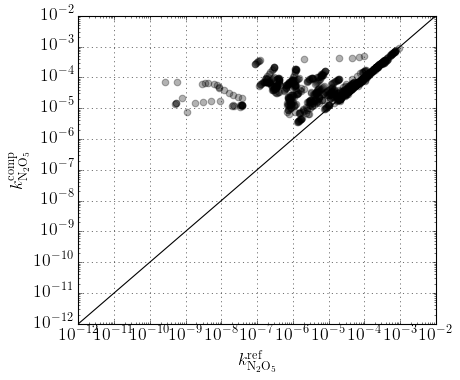

In [19]:
# Only nighttime cases

# from matplotlib import style
# plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6,5))
plt.xscale('log'); plt.yscale('log')
plt.plot([1e-15,1e-2],[1e-15,1e-2],'-', color='k',lw=1)
# plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df3["n2o5_uptake_ref"]
y = df3["n2o5_uptake_comp"]
a = plt.scatter(x, y, s = 35, color = 'k', alpha = 0.3)
plt.xlim(1e-12,1e-2);plt.ylim(1e-12,1e-2)
plt.xlabel(r'$k_{\rm N_2O_5}^{\rm ref}$')
plt.ylabel(r'$k_{\rm N_2O_5}^{\rm comp}$')
# plt.text(0.0015, 0.023, r'$(a)\,dust)$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# chi

## read data

In [2]:
# read in data with dust emission
gamma_pop = np.zeros((2,100,49))
k = np.zeros((2,100,49))
chi_n2o5 = np.zeros((6,2,100,49))
bulk_masses = np.zeros((100,49))
wet_frac = np.zeros((2,100,49))
npart = np.zeros((2,100,49))
nwet = np.zeros((2,100,49))
tot_surf_area = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            k[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            k[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            chi_n2o5[0, 0, sce, :] = ncf.variables["chi_pr"].data
            chi_n2o5[0, 1, sce, :] = ncf.variables["chi_comp"].data
            chi_n2o5[1, 0, sce, :] = ncf.variables["chi_h2o_pr"].data
            chi_n2o5[1, 1, sce, :] = ncf.variables["chi_h2o_comp"].data
            chi_n2o5[2, 0, sce, :] = ncf.variables["chi_no3_pr"].data
            chi_n2o5[2, 1, sce, :] = ncf.variables["chi_no3_comp"].data
            chi_n2o5[3, 0, sce, :] = ncf.variables["chi_so4_pr"].data
            chi_n2o5[3, 1, sce, :] = ncf.variables["chi_so4_comp"].data
            chi_n2o5[4, 0, sce, :] = ncf.variables["chi_org_pr"].data
            chi_n2o5[4, 1, sce, :] = ncf.variables["chi_org_comp"].data
            chi_n2o5[5, 0, sce, :] = ncf.variables["chi_dust_pr"].data
            chi_n2o5[5, 1, sce, :] = ncf.variables["chi_dust_comp"].data
            bulk_masses[sce, :] = ncf.variables['bulk_h2o_masses'].data * 1e9  # kg to µg
            nwet[0, sce, :] = ncf.variables['nwet'].data
            nwet[1, sce, :] = ncf.variables['nwet_avg'].data
            npart[0, sce, :] = ncf.variables['npart'].data
            npart[1, sce, :] = ncf.variables['npart_avg'].data
            tot_surf_area[0, sce, :] = ncf.variables['tot_surf_area_pr'].data
            tot_surf_area[1, sce, :] = ncf.variables['tot_surf_area_avg'].data
            time = ncf.variables["time"].data/3600
            wet_frac[0, sce,:] = nwet[0, sce, :]/npart[0, sce, :]
            wet_frac[1, sce,:] = nwet[1, sce, :]/npart[1, sce, :]

In [3]:
rh = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    rh[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,2] # time, temperature, RH, pressure, mixing height

print(rh.shape)
print(rh)
# print(df_env)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[0.8287 0.8287 0.8287 ... 0.8287 0.8287 0.8287]
 [0.7009 0.7009 0.7009 ... 0.7009 0.7009 0.7009]
 [0.4861 0.4861 0.4861 ... 0.4861 0.4861 0.4861]
 ...
 [0.5027 0.5027 0.5027 ... 0.5027 0.5027 0.5027]
 [0.7555 0.7555 0.7555 ... 0.7555 0.7555 0.7555]
 [0.9138 0.9138 0.9138 ... 0.9138 0.9138 0.9138]]


In [6]:
# calculate gamma_pop_error
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()
k_error = (k[1,:,:].ravel() - 
           k[0,:,:].ravel())/k[0,:,:].ravel()
tot_surf_area_diff = (tot_surf_area[1, :, :].ravel() - tot_surf_area[0, :, :].ravel())/tot_surf_area[0, :, :].ravel()

d_chi = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # wsd: with seasalt and dust
          "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
          "gamma_pop_error": gamma_pop_error * 100,
          "k_ref": k[0, :, :].ravel(),  # wsd: with seasalt and dust
          "k_comp": k[1, :, :].ravel(),
          "k_error": k_error * 100,
          "chi_pr": chi_n2o5[0,0,:,:].ravel() * 100,
          "chi_comp": chi_n2o5[0,1,:,:].ravel() * 100,
          "chi_h2o_pr": chi_n2o5[1,0,:,:].ravel() * 100,
          "chi_h2o_comp": chi_n2o5[1,1,:,:].ravel() * 100,
          "chi_no3_pr": chi_n2o5[2,0,:,:].ravel() * 100,
          "chi_no3_comp": chi_n2o5[2,1,:,:].ravel() * 100,
          "chi_so4_pr": chi_n2o5[3,0,:,:].ravel() * 100,
          "chi_so4_comp": chi_n2o5[3,1,:,:].ravel() * 100,
          "chi_org_pr": chi_n2o5[4,0,:,:].ravel() * 100,
          "chi_org_comp": chi_n2o5[4,1,:,:].ravel() * 100,
          'wet_frac_pr': wet_frac[0,:,:].ravel() * 100,
          'wet_frac_comp': wet_frac[1,:,:].ravel() * 100,
          'tot_surf_area_diff': tot_surf_area_diff * 100,
          'rh': rh[:,:].ravel() * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_chi = pd.DataFrame(data=d_chi)
print(df_chi.shape)

df_chi_2ndngt = df_chi[((df_chi.index.values % 49) >= 37) & ((df_chi.index.values % 49) <= 48)]
print(df_chi_2ndngt.shape)

df4 = df_chi_2ndngt.dropna()
print(df4.shape)
print(df4.iloc[:,8])

(4900, 20)
(1200, 20)
(899, 20)
37      99.765150
38      99.711138
39      99.678595
40      99.659709
41      99.669074
          ...    
4895    99.996697
4896    99.996180
4897    99.995740
4898    99.995381
4899    99.995257
Name: chi_h2o_pr, Length: 899, dtype: float64


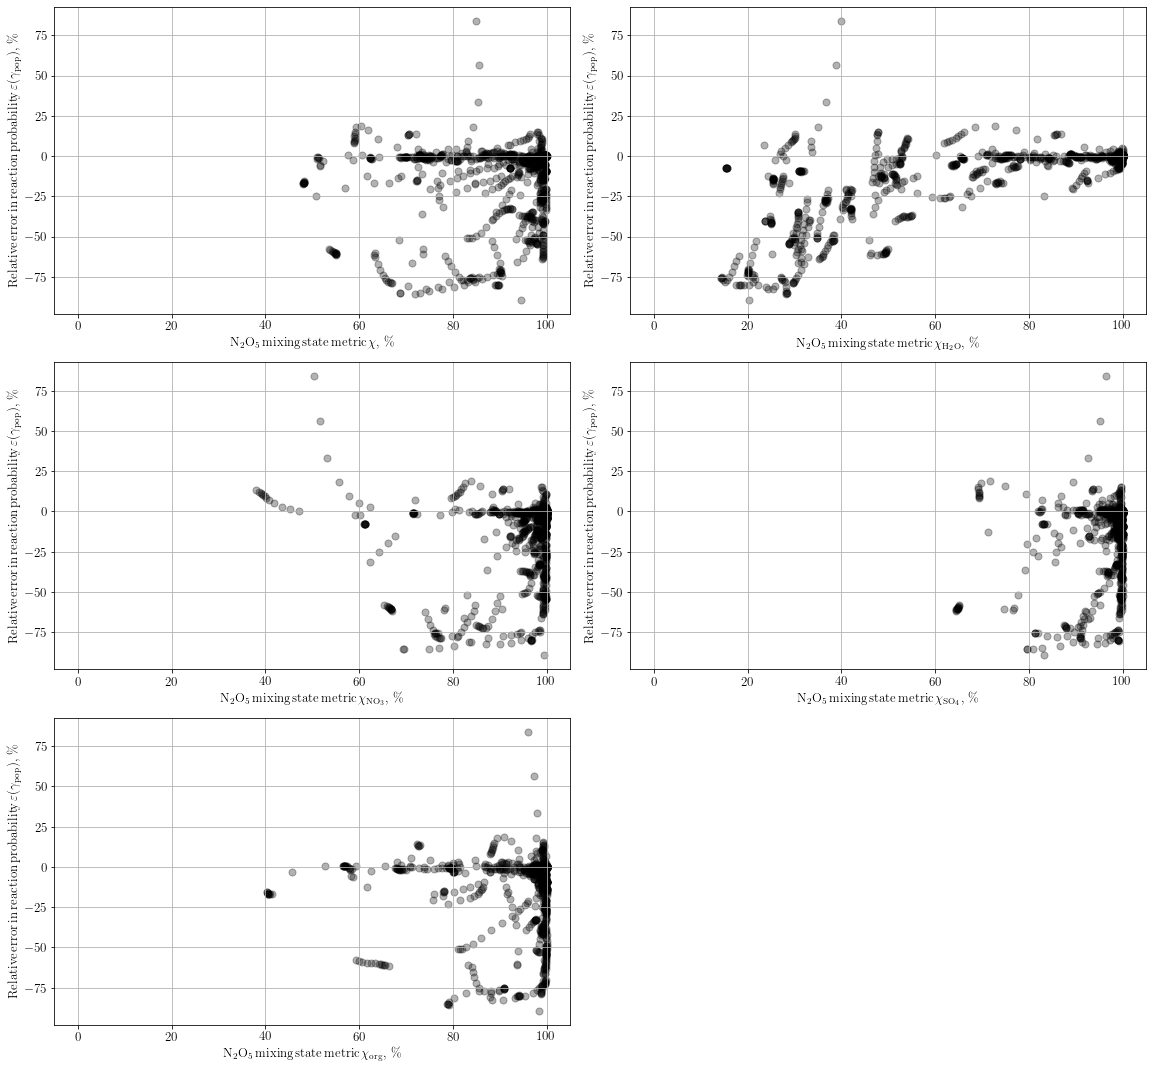

In [8]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df4.chi_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df4.chi_h2o_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df4.chi_no3_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df4.chi_so4_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df4.chi_org_pr, df4.gamma_pop_error, color = 'k', alpha = 0.3, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

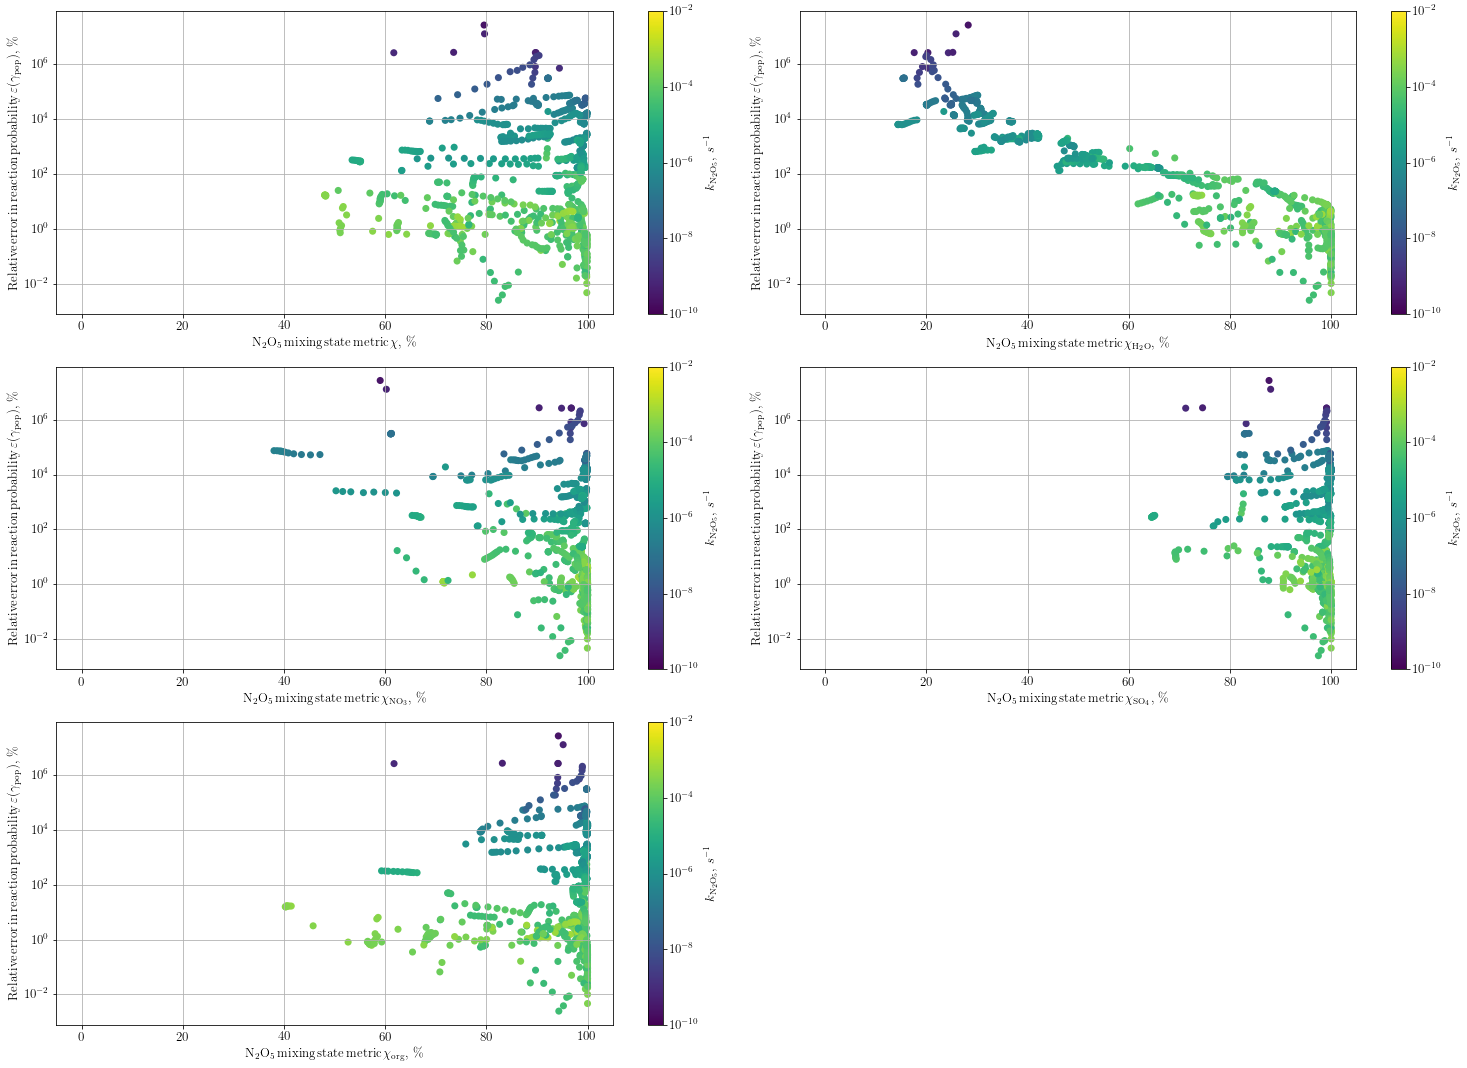

In [9]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6.5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df4.chi_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df4.chi_h2o_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df4.chi_no3_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df4.chi_so4_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df4.chi_org_pr, abs(df4.k_error), c = df4.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

# low chi value cases

## selection

In [10]:
df_dust_lowchi = df4[(df4.chi_h2o_pr <= 20)]
print(df_dust_lowchi.shape)
print(df_dust_lowchi.sort_values('chi_h2o_pr', ascending=True))

case_index = df_dust_lowchi.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)

(25, 20)
      gamma_pop_ref  gamma_pop_comp  gamma_pop_error         k_ref    k_comp  \
4300       0.018993        0.004636       -75.591740  1.501637e-06  0.000096   
4301       0.018987        0.004606       -75.742594  1.409211e-06  0.000091   
4303       0.018963        0.004673       -75.357223  1.252289e-06  0.000082   
4302       0.018975        0.004609       -75.708095  1.338272e-06  0.000085   
4304       0.018613        0.004270       -77.056741  1.143015e-06  0.000074   
4305       0.017984        0.003941       -78.087105  1.073923e-06  0.000068   
924        0.019970        0.018441        -7.654973  1.223603e-07  0.000368   
925        0.019973        0.018444        -7.658390  1.155698e-07  0.000350   
926        0.019975        0.018448        -7.646624  1.085052e-07  0.000332   
927        0.019975        0.018447        -7.653168  1.010032e-07  0.000314   
928        0.019980        0.018445        -7.683426  9.539307e-08  0.000296   
929        0.019977        0.01

## read data

In [11]:
s3 = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','h2o','ca','co3'])
print(len(s3))
print(s3)
print('bulk_'+ s3[0] + '_masses')

12
0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9     h2o
10     ca
11    co3
dtype: object
bulk_no3_masses


In [12]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios"
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s3[i] + '_masses'].data * 1e9  # kg to µg

d_m = {'inorganics': (bulk_masses[0,:,:].ravel() + bulk_masses[1,:,:].ravel() + bulk_masses[4,:,:].ravel()
                    + bulk_masses[5,:,:].ravel() + bulk_masses[6,:,:].ravel() + bulk_masses[7,:,:].ravel()
                    + bulk_masses[10,:,:].ravel() + bulk_masses[11,:,:].ravel()),
        'oin': bulk_masses[8,:,:].ravel(),
        'h2o': bulk_masses[9,:,:].ravel(),
        'organics': (bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()),
        "chi_h2o_pr": chi_n2o5[1,0,:,:].ravel() * 100}
df_m = pd.DataFrame(data=d_m)
print(df_m.shape)
# print(df_m)
df_m_2ndngt = df_m[((df_m.index.values % 49) >= 37) & ((df_m.index.values % 49) <= 48)]  # ngt: night
print(df_m_2ndngt.shape)
df_m_lowchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr <=20)]
print(df_m_lowchi.shape)
df_m_lowchi.round({'chi_h2o_pr':2})

df_m_highchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr >=98)]
print(df_m_highchi.shape)
df_m_highchi.round({'chi_h2o_pr':2})
# print(df_m_lowchi)

(4900, 5)
(1200, 5)
(25, 5)
(232, 5)


,inorganics,oin,h2o,organics,chi_h2o_pr
37,13.418457,0.0,22.783735,5.347651,99.77
38,14.273151,0.0,24.125827,6.629223,99.71
39,14.997626,0.0,25.247946,7.746799,99.68
40,16.419159,0.0,27.482207,9.219687,99.66
41,17.004402,0.0,28.433140,9.888660,99.67
...,...,...,...,...,...
4895,49.921381,0.0,185.207506,6.761787,100.00
4896,49.703080,0.0,184.555105,6.210990,100.00
4897,51.239649,0.0,190.421843,5.916395,100.00
4898,54.890030,0.0,204.167207,5.872708,100.00


<AxesSubplot:xlabel='chi_h2o_pr'>

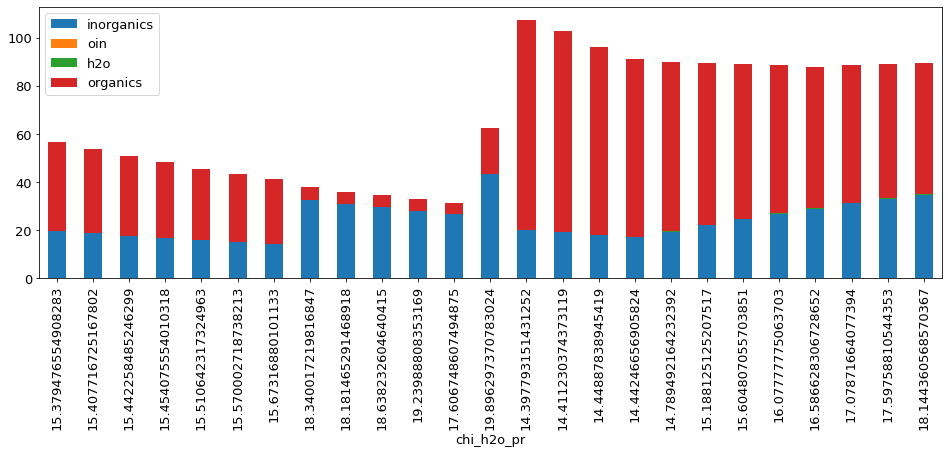

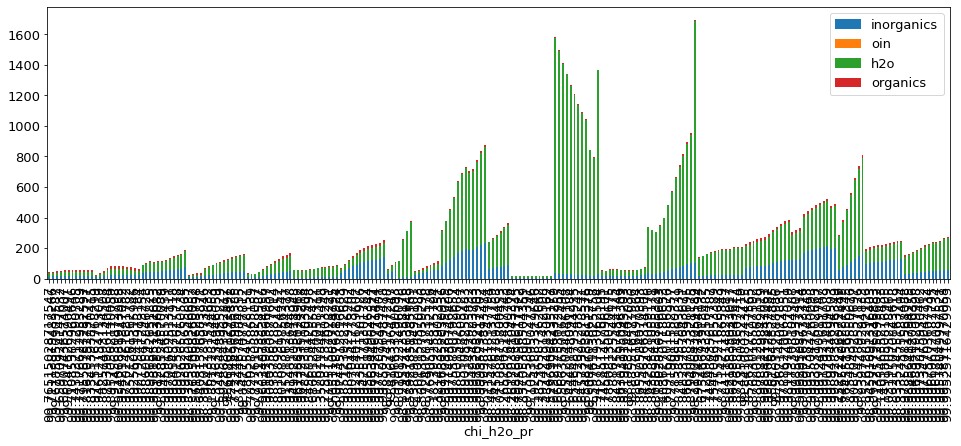

In [13]:
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

df_m_lowchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
df_m_highchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# time series

## read data

In [14]:
# Read data
gas_mixing_ratio = np.zeros((3, 100, 49, 77))
sce_ind = np.zeros(100)
lib_ind = np.zeros(3)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            lib = int(filename[-67:-66])
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[lib, sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            lib_ind[lib] = lib
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [15]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[280.455 280.455 280.455 ... 280.455 280.455 280.455]
 [276.965 276.965 276.965 ... 276.965 276.965 276.965]
 [272.108 272.108 272.108 ... 272.108 272.108 272.108]
 ...
 [282.038 282.038 282.038 ... 282.038 282.038 282.038]
 [279.926 279.926 279.926 ... 279.926 279.926 279.926]
 [280.519 280.519 280.519 ... 280.519 280.519 280.519]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [16]:
n2o5_error = (gas_mixing_ratio[2, :, :, 7].ravel() - gas_mixing_ratio[1, :, :, 7].ravel())/gas_mixing_ratio[1, :, :, 7].ravel()
d_gas = {'n2o5_ref': gas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': gas_mixing_ratio[2, :, :, 7].ravel(),
         "n2o5_error": n2o5_error * 100,
         'o3_ref': gas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': gas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': gas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': gas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': gas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': gas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         'hno3_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         }
df_gas = pd.DataFrame(data=d_gas)

In [17]:
df_gas_2ndngt = df_gas[((df_gas.index.values % 49) >= 37) & ((df_gas.index.values % 49) <= 48)]  # ngt: night
print(df_gas_2ndngt.shape)

df_gas_2ndday = df_gas[((df_gas.index.values % 49) >= 25) & ((df_gas.index.values % 49) <= 48)]
print(df_gas_2ndday.shape)

case_index = df_gas_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

dn_case_index = df_gas_2ndday.index.values  # dn: day and night
dn_sce_index  = (dn_case_index/49).astype(int)
dn_hour_index = dn_case_index % 49

pd.set_option('display.max_rows', None)
print(df_gas_2ndngt.sort_values('n2o5_error', ascending = True))

(1200, 11)
(2400, 11)
       n2o5_ref  n2o5_comp  n2o5_error      o3_ref     o3_comp      no_ref  \
929    0.205245   0.017787  -91.333938   62.106365   62.068991    0.005980   
928    0.244541   0.022410  -90.835924   63.063996   62.989712    0.000009   
927    0.274803   0.026591  -90.323654   64.056779   63.932240    0.000010   
926    0.308490   0.032263  -89.541667   65.130853   64.950897    0.000010   
830    0.058053   0.006400  -88.975727    0.160987    0.128554   13.499912   
925    0.344642   0.039963  -88.404547   66.294633   66.054826    0.000011   
829    0.692519   0.083831  -87.894799    0.381504    0.275775    6.534767   
924    0.380518   0.050352  -86.767379   67.558013   67.255096    0.000011   
4304   1.688770   0.247335  -85.354146   42.208354   39.848986    9.803438   
923    0.410007   0.064286  -84.320836   68.933120   68.565328    0.000012   
4305   1.067045   0.169571  -84.108328   40.352002   38.205149   17.705891   
4303   2.708936   0.438206  -83.823705   5

In [18]:
#Read data
bulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust_log'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            sce = int(filename[-29:-27])
            lib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[lib,0,sce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            bulk_conc[lib,1,sce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

nitrate_error = ((gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) +  bulk_conc[2, 0, :, :].ravel())-(gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel()))/(gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel())
        
d_aero = {'no3_ref': bulk_conc[1, 0, :, :].ravel(),
          'no3_comp': bulk_conc[2, 0, :, :].ravel(),
          'nitrate_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) + bulk_conc[1, 0, :, :].ravel(),
          'nitrate_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp) +  bulk_conc[2, 0, :, :].ravel(),
          'nitrate_error': nitrate_error * 100,
          'nh4_ref': bulk_conc[1, 1, :, :].ravel(),
          'nh4_comp': bulk_conc[2, 1, :, :].ravel()}
df_aero = pd.DataFrame(data=d_aero)
print(df_aero.shape)  

# time = np.linspace(0,120,121)
# print(time)

(4900, 7)


In [19]:
df_aero_2ndngt = df_aero[((df_aero.index.values % 49) >= 37) & ((df_aero.index.values % 49) <= 48)]  # ngt: night
print(df_aero_2ndngt.shape)

case_index = df_aero_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

pd.set_option('display.max_rows', None)
print(df_aero_2ndngt.sort_values('nitrate_error', ascending = True))

(1200, 7)
           no3_ref      no3_comp  nitrate_ref  nitrate_comp  nitrate_error  \
625   1.016470e+01  0.000000e+00    20.852658     13.193634     -36.729244   
3468  2.487470e+01  1.452842e+01    51.003665     33.819106     -33.692791   
3469  2.354077e+01  1.386256e+01    54.954804     36.725275     -33.171858   
3467  2.622259e+01  1.533311e+01    45.786241     30.854436     -32.611990   
3470  2.237958e+01  1.307865e+01    57.326509     38.795994     -32.324513   
3471  2.116967e+01  1.243274e+01    58.134052     40.178875     -30.885818   
3472  2.015527e+01  1.182722e+01    57.986781     40.878669     -29.503469   
3478  2.301238e+01  1.156215e+01    44.525944     31.478928     -29.302054   
3473  1.906490e+01  1.119621e+01    56.953136     40.942474     -28.111994   
3474  1.814484e+01  1.058768e+01    55.537652     40.558496     -26.971172   
3475  1.738149e+01  9.617180e+00    53.922133     39.418760     -26.896884   
3476  1.405198e+01  7.300380e+00    49.463758     36.4

In [20]:
n2o5_error = (df_gas_2ndngt["n2o5_comp"] - df_gas_2ndngt["n2o5_ref"])/df_gas_2ndngt["n2o5_ref"]
nitrate_error = ((df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"])-(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"]))/(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"])
print(n2o5_error.max(),n2o5_error.min(),nitrate_error.max(),nitrate_error.min())
print(n2o5_error.sort_values(ascending = True))
print(nitrate_error.sort_values(ascending = True))
print(df_gas_2ndngt)
print(df_aero_2ndngt)

2.9277593794450594 -0.9133393812182803 1.8255829957642837 -0.36729244294479185
929    -9.133394e-01
928    -9.083592e-01
927    -9.032365e-01
926    -8.954167e-01
830    -8.897573e-01
925    -8.840455e-01
829    -8.789480e-01
924    -8.676738e-01
4304   -8.535415e-01
923    -8.432084e-01
4305   -8.410833e-01
4303   -8.382370e-01
1322   -8.195590e-01
922    -8.086775e-01
4302   -8.017389e-01
4306   -7.908814e-01
1321   -7.906558e-01
921    -7.685459e-01
1224   -7.680075e-01
828    -7.671160e-01
4301   -7.627996e-01
3670   -7.573562e-01
1320   -7.555665e-01
4300   -7.391265e-01
831    -7.253490e-01
920    -7.154829e-01
1319   -7.129777e-01
4307   -6.791179e-01
1518   -6.702141e-01
1318   -6.614019e-01
1517   -6.598008e-01
3669   -6.585064e-01
1223   -6.525731e-01
1516   -6.480315e-01
3668   -6.480226e-01
919    -6.390284e-01
1515   -6.330131e-01
3667   -6.328798e-01
827    -6.193449e-01
1311   -6.188909e-01
2391   -6.174204e-01
1312   -6.146881e-01
1514   -6.121435e-01
3666   -6.116725e-

## plot

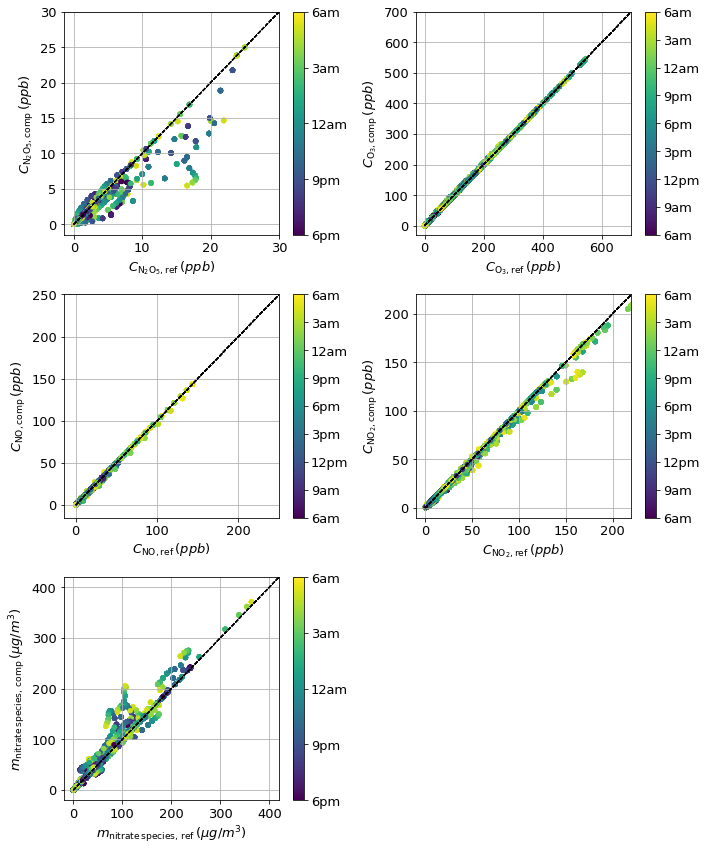

In [21]:
plt.figure(figsize=(10,12))
# from matplotlib import style
# plt.style.use('classic')
# plt.figure(facecolor="white")
# mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(df_gas_2ndngt["n2o5_ref"], df_gas_2ndngt["n2o5_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(-1.5,30); plt.ylim(-1.5,30)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(df_gas_2ndday["o3_ref"], df_gas_2ndday["o3_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-30,700); plt.ylim(-30,700)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(df_gas_2ndday["no_ref"], df_gas_2ndday["no_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-15,250); plt.ylim(-15,250)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(df_gas_2ndday["no2_ref"], df_gas_2ndday["no2_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-10,220); plt.ylim(-10,220)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"], df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e3],[0,3e3],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(-20,420); plt.ylim(-20,420)
plt.xlabel(r'$m_{\rm nitrate\,species,\,ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm nitrate\,species,\,comp} \, (\mu g/m^3)$')
plt.grid()

# plt.subplot(3,2,6)
# for t in range(37, 49, 1):
#     p_hno3 = plt.scatter(df_gas_2ndngt["hno3_ref"], df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
#     plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

# plt.clim(37,49)
# cbar = plt.colorbar(ticks = np.linspace(37,49,5))
# cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# plt.xlim(-10,200); plt.ylim(-10,200)
# plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
# plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
# plt.grid()

plt.tight_layout(pad = 1.0)

# plt.savefig('mixing_state_impact_time_series.pdf')

# composition